In [3]:
# Imports modules
import numpy as np
from keras import Sequential
from keras.layers import LSTM, Dense, InputLayer, BatchNormalization
import pandas as pd
from matplotlib import pyplot as plt
from utils import format_ppm_x

import tensorflow as tf

from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import MinMaxScaler\

In [4]:
batch_size = 5
num_features = ()
num_prev_vals = 8

In [5]:
data = format_ppm_x(pd.read_csv('../data/ppm.csv'), num_prev_vals)

# X = np.array(data.iloc[:, data.columns != 0]).reshape(num_prev_vals*(63-num_prev_vals), 1)
X = data.iloc[:, data.columns != 0]

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

Y = data[0]

checkpoint 1


In [31]:
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(num_prev_vals,1)))
    # model.add(LSTM(128, activation='relu', dropout=0.05, return_sequences=True))
    model.add(LSTM(64, activation='relu', dropout=0.1, return_sequences=True))
    model.add(LSTM(16, activation='relu', dropout=0.05, return_sequences=True))
    # model.add(BatchNormalization())
    # model.add(Dense(8, activation='relu'))
    # model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    return model

In [35]:
model = create_model()

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.6,
    nesterov=True,
)

model.compile(optimizer='Adagrad', loss='mae', metrics=['mae'])

In [36]:
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=0.8)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=5,
    epochs=300
)

Epoch 1/300
9/9 [==============================] - 4s 69ms/step - loss: 361.7089 - mae: 361.7089 - val_loss: 367.9928 - val_mae: 367.9928
Epoch 2/300
9/9 [==============================] - 0s 15ms/step - loss: 361.7020 - mae: 361.7020 - val_loss: 367.9867 - val_mae: 367.9867
Epoch 3/300
9/9 [==============================] - 0s 11ms/step - loss: 361.6961 - mae: 361.6961 - val_loss: 367.9811 - val_mae: 367.9811
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 361.6898 - mae: 361.6898 - val_loss: 367.9753 - val_mae: 367.9753
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 361.6844 - mae: 361.6844 - val_loss: 367.9697 - val_mae: 367.9697
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 361.6783 - mae: 361.6783 - val_loss: 367.9641 - val_mae: 367.9641
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 361.6731 - mae: 361.6731 - val_loss: 367.9586 - val_mae: 367.9586
Epoch 8/300
9/9 [=================

KeyboardInterrupt: 

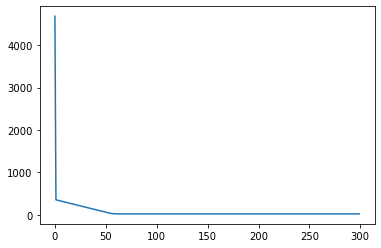

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])